# Example 2
* Make a graph of the LV mass, the mass at-risk, and the percent mass at risk
    * Select the worst lesions in each patient, therefore only **one** lesion is assessed for each patient

## Import dependencies

In [39]:
import pyodbc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Connect to database

In [2]:
db_type = 'Microsoft Access Driver (*.mdb, *.accdb)'
db_path = r'C:\Users\Admin\Desktop\db_CONFIRM.accdb'
pyodbc_str = (
    r'DRIVER={{{DB_TYPE}}};'
    r'DBQ={DB_PATH};'
    ).format(DB_TYPE=db_type, DB_PATH=db_path)

In [3]:
conn = pyodbc.connect(pyodbc_str)

## Create SQL query

In [4]:
sql_query = '''SELECT tblMCP.id_vessel_study, tblMCP.omlddistance_valid_vitrea, tblMCP.mass_lv_g, tblMCP.mass_mcp_g, tblMCP.id_vessel, tblOMLDistQualityControl.db_omlddistance_valid, tblConfirmPerLesion.lesion_worst, tblConfirmPerLesion.mi_type, tblConfirmPerLesion.mi_event
FROM (tblOMLDistQualityControl INNER JOIN tblMCP ON tblOMLDistQualityControl.id_vessel_lesion = tblMCP.id_vessel_study) INNER JOIN tblConfirmPerLesion ON tblMCP.id_vessel_study = tblConfirmPerLesion.lesion_id
WHERE (((tblMCP.omlddistance_valid_vitrea)=1) AND ((tblMCP.id_vessel) Like '%dist') AND ((tblOMLDistQualityControl.db_omlddistance_valid)='1') AND ((tblConfirmPerLesion.lesion_worst)=1) AND ((tblConfirmPerLesion.mi_event)=1));
'''

In [13]:
#load the access query into a pandas dataframe
df = pd.read_sql_query(sql_query, conn)
df.head()

,id_vessel_study,omlddistance_valid_vitrea,mass_lv_g,mass_mcp_g,id_vessel,db_omlddistance_valid,lesion_worst,mi_type,mi_event
0,10128_Lesion_RCA2,1.0,273.35,64.42,rca_dist,1,1,1,1
1,10255_Lesion_D1.2,1.0,237.21,25.27,lad_dist,1,1,4,1
2,10399_Lesion_R-PDA1,1.0,190.16,29.70,rca_dist,1,1,2,1
3,10947_Lesion_LAD2,1.0,167.87,61.52,lad_dist,1,1,2,1
4,11486_Lesion_RCA2,1.0,193.52,43.23,rca_dist,1,1,4,1


In [17]:
df['percent_mass_at_risk'] = ((df['mass_mcp_g'] / df['mass_lv_g']) * 100)
df.head()

,id_vessel_study,omlddistance_valid_vitrea,mass_lv_g,mass_mcp_g,id_vessel,db_omlddistance_valid,lesion_worst,mi_type,mi_event,percent_mass_at_risk
0,10128_Lesion_RCA2,1.0,273.35,64.42,rca_dist,1,1,1,1,23.566856
1,10255_Lesion_D1.2,1.0,237.21,25.27,lad_dist,1,1,4,1,10.653008
2,10399_Lesion_R-PDA1,1.0,190.16,29.70,rca_dist,1,1,2,1,15.618427
3,10947_Lesion_LAD2,1.0,167.87,61.52,lad_dist,1,1,2,1,36.647406
4,11486_Lesion_RCA2,1.0,193.52,43.23,rca_dist,1,1,4,1,22.338776


In [25]:
df_stemi = df[(df['mi_type'] == '1')]
df_other = df[(df['mi_type'] != '1')]

## Create plot

In [58]:
avg_mass_lv_stemi = df_stemi['mass_lv_g'].mean()
avg_mass_lv_other = df_other['mass_lv_g'].mean()

avg_mass_mcp_stemi = df_stemi['mass_mcp_g'].mean()
avg_mass_mcp_other = df_other['mass_mcp_g'].mean()

percent_mass_at_risk_stemi = (avg_mass_mcp_stemi / avg_mass_lv_stemi) * 100
percent_mass_at_risk_other = (avg_mass_mcp_other / avg_mass_lv_other) * 100

<Figure size 3200x400 with 0 Axes>

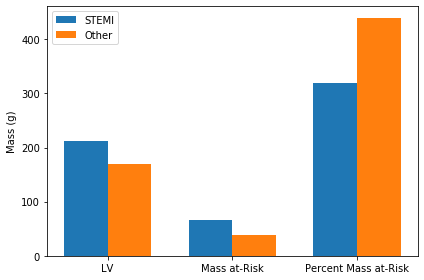

In [59]:
fig=plt.figure(figsize=(40,5), dpi= 80, facecolor='w', edgecolor='k')

labels = ['LV', 'Mass at-Risk', 'Percent Mass at-Risk']
stemi_numbers = [avg_mass_lv_stemi, avg_mass_mcp_stemi, percent_mass_at_risk_stemi]
other_numbers = [avg_mass_lv_other, avg_mass_mcp_other, percent_mass_at_risk_other]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, stemi_numbers, width, label='STEMI')
rects2 = ax.bar(x + width/2, other_numbers, width, label='Other')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mass (g)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.show()